# Project 4: Regression Modeling
## Due: Monday, Nov. 3rd, 2025

### Names: David Cortes
### Course Level: Grad

**Introduction:**
* In this project, we explore building regression models to predict what you might expect for miles/gallon (MPG) fuel economy based on vehicle charateristics

<u>**Note:** The project will be graded by me running your notebook from top to bottom (choosing the "run all" option) - if it errors out at any point - this is where I stop grading and you'll lose ALL points after the error - Even if they are correct!</u>

* <u>Moral of the story is, **Make sure your entire notebook executes from top to bottom and you're happy with the results BEFORE you submit to the drop box!**</u>

**Objectives:**
* The objective of this project is to use scikit-learn to investigate different regression models for fuel economy estimation.

# Let's grab the data and have a look at the dataset

## **Important note, to get the data, we need to install the UCIMLRepo package using pip**
* In your command line, run the following:
    - pip install ucimlrepo

## All Students

**Problem A (60pts)**

1. (5pts) Let's grab the data from UCI (you'll need to pip install ucimlrepo)

* Note: a description of the dataset can be found [Here](https://archive.ics.uci.edu/dataset/9/auto+mpg)

* <u><b>Questions:</b> How many features are there per observation? What do these features represent? How many classes? How many observations are in the data?</u>

# Answers:

*   How many features are there per observation?   
There are 7 features (or attributes) per observation
*   What do these features represent?  
The features are:
    1.   cylinders: multi-valued discrete
    2.   displacement: continuous
    3.   horsepower: continuous
    4.   weight: continuous
    5.   acceleration: continuous

    model year: multi-valued discrete
    origin: multi-valued discrete
    (The dataset also includes "mpg" as the continuous target variable to be predicted and "car name" as a unique ID for each instance.)
*   How many classes?  
This dataset is used for regression, not classification. The goal is to predict the "mpg" (miles per gallon), which is a continuous value, not a discrete class. Therefore, there are 0 classes. 
*   How many observations are in the data?  
There are 398 observations (or instances) in the dataset.



In [95]:
import numpy as np
#!pip install mlxtend
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo # Be sure to read above - need to install the ucimlrepo package using pip #
  
# fetch dataset
dataset = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = dataset.data.features
y = dataset.data.targets

# variable information, features, shapes, etc.
print("Variable Information:")
print(dataset.variables)
print("\nFeatures (X) shape:", X.shape)
print("Targets (y) shape:", y.shape)
print("\nFirst 5 rows of Features (X):")
display(X.head())
print("\nFirst 5 rows of Targets (y):")
display(y.head())

Variable Information:
           name     role         type demographic description units  \
0  displacement  Feature   Continuous        None        None  None   
1           mpg   Target   Continuous        None        None  None   
2     cylinders  Feature      Integer        None        None  None   
3    horsepower  Feature   Continuous        None        None  None   
4        weight  Feature   Continuous        None        None  None   
5  acceleration  Feature   Continuous        None        None  None   
6    model_year  Feature      Integer        None        None  None   
7        origin  Feature      Integer        None        None  None   
8      car_name       ID  Categorical        None        None  None   

  missing_values  
0             no  
1             no  
2             no  
3            yes  
4             no  
5             no  
6             no  
7             no  
8             no  

Features (X) shape: (398, 7)
Targets (y) shape: (398, 1)

First 5 rows of Fe

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1



First 5 rows of Targets (y):


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [96]:
# Check for missing values in the data and remove the observations with missing values #
print("Missing values in Features (X):\n", X.isnull().sum())
print("\nMissing values in Targets (y):\n", y.isnull().sum())

Missing values in Features (X):
 displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Missing values in Targets (y):
 mpg    0
dtype: int64


### <u>Question: Is there missing data?  If so, which features are missing and how many observations are they missing in?</u>

yes, 6 elements are missing from the data(horse power)

2. (5pts.) Remove the missing data from both the feature set AND the associated targets

In [97]:
# Important:  Get the index (rows) where the missing data exist in X BEFORE removing them! #
missing_indices = X[X.isnull().any(axis=1)].index

# Now, let's remove the rows (observations) with missing values and re-check the size of the data #
# Don't forget to also drop the corresponding target values for each sample with missing data #
X = X.drop(missing_indices)
y = y.drop(missing_indices)

# Print the new shapes for both Data (X) and targets (y)
print("New Features (X) shape:", X.shape)
print("New Targets (y) shape:", y.shape)

New Features (X) shape: (392, 7)
New Targets (y) shape: (392, 1)


### Okay, our data "should" be in good shape now - let's do some EDA

3. (10 pts) Perform some EDA as outlined below and discuss your observations/results (i.e., provide a description of what the EDA is telling you about correlations, etc.)

* Let's plot a scatterplotmatrix (should look similar to the one below): <u>What features do yo notice are correlated, uncorrelated, outliers?, etc.  Describe what information you get from the plot below</u>

<u>Describe your plot here:</u>


<img src="Figures/ScatterPlotMat.png" alt="Scatter Plot Matrix" style="width:500px;"/>

In [98]:
import matplotlib.pyplot as plt

# Need to import mlextend
# conda install conda-forge::mlxtend

from mlxtend.plotting import scatterplotmatrix 

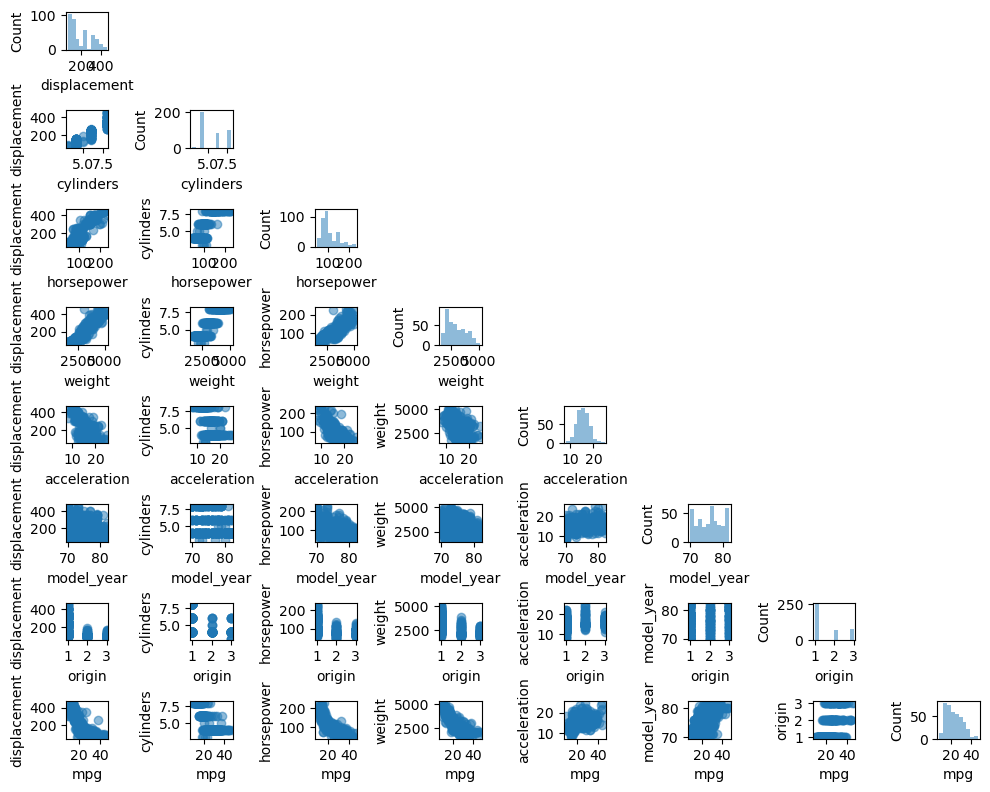

In [99]:
# Plot the scatterplotmatrix to get an idea about how correlated the features are across samples #
# Note: we currently have the data features in X and the targets in y.  We need to concatinate them
# so we can get an idea about correlations w.r.t. the targets too #
import pandas as pd

df = pd.concat([X, y], axis=1)
cols = df.columns.tolist()

scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

What features do yo notice are correlated, uncorrelated, outliers?, etc. Describe what information you get from the plot below(now above):  
  

Based on the scatterplot matrix, we can observe the relationships between different features and the target variable (mpg).  
  
Correlated Features: 
Look for plots where the points tend to follow a clear trend (either increasing or decreasing). For example, you might see a negative correlation between weight and mpg (as weight increases, mpg tends to decrease), and potentially similar relationships with displacement and horsepower. cylinders might also show some correlation, though it's a discrete variable.  
  
Uncorrelated Features: Look for plots where the points appear randomly scattered with no discernible trend. Features like model_year and origin might have weaker linear correlations with other features or mpg, though they could still have other types of relationships.  
  
Outliers: Outliers can appear as points that lie far away from the general cluster of other points in any given scatterplot. These could represent unusual car models or data entry errors.  
  
Information from the Plot: The scatterplot matrix helps visualize pairwise relationships between all variables. Strong linear trends suggest good candidates for linear regression features. Non-linear patterns might indicate that a simple linear model is not sufficient and that polynomial or other non-linear models could be more appropriate. The spread of the data in each plot can also give an idea of the variance and potential issues with the data.

* Let's also look at a correlation plot (should look similar to the plot below): <u>What features do yo notice are correlated, uncorrelated, etc.  Describe what information you get from the plot below</u>

<u>Describe your plot here:</u>

<img src="Figures/CorrelationPlot.png" alt="Correlation Plot" style="width:400px;"/>

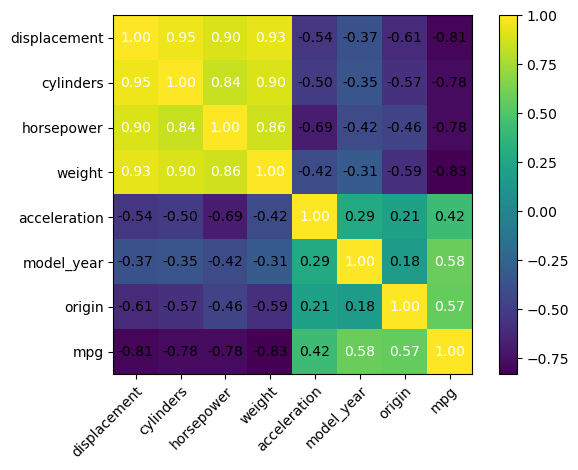

In [100]:
import numpy as np
from mlxtend.plotting import heatmap
# Look at the correlation matrix #
cols = df.columns
cm = np.corrcoef(df.values.T)

heatmap(cm, row_names=cols, column_names=cols, colorbar=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<u>What features do yo notice are correlated, uncorrelated, etc.  Describe what information you get from the plot below(now above)</u>  
The correlation plot (heatmap) provides a quantitative view of the linear relationships between features. The color intensity and the values in each cell indicate the correlation coefficient between two variables.  
  
Correlated Features:   
Look for cells with colors that are strongly positive (close to +1, often represented by warm colors like red) or strongly negative (close to -1, often represented by cool colors like blue). For this dataset, you'll likely see strong negative correlations between mpg and features like weight, displacement, and horsepower. You'll also see strong positive correlations among displacement, cylinders, horsepower, and weight.  
  
Uncorrelated Features:  
Look for cells with colors that are close to zero (often represented by a neutral color like white or gray). Features with correlation coefficients close to 0 have little to no linear relationship.  
  
Information from the Plot:   
The heatmap provides a concise summary of pairwise linear correlations. It quickly highlights which features have the strongest linear relationships with the target variable (mpg) and with each other. This information is valuable for feature selection and understanding potential multicollinearity among features (when features are highly correlated with each other), which can affect some regression models.

### Okay, let's go ahead and build a model:  **You can choose if you want to build a simple linear regression model OR a robust regression model (RANSAC)**

##### **Note:** Don't forget, we need to: a) scale the data and b) do a test_train_split to evaluate model performance (let's do 80% train and 20% test this time)

4. (40pts.) Build a linear regression model using a single feature of your choice (I chose weight but feel free to pick what you find interesting from the EDA above).  Perform a performance analysis of your second model using:
    - Residues
    - $R^2$ (coefficient of determination)

* The first model you build will be a simple linear model of your_feature vs. mpg.
* The second model will include ALL of the features

In [101]:
# It looked like weight was highly correlated with mpg so I grabbed this data (use whatever feature you like here) #
X_weight = df[['weight']]
y_mpg = df['mpg']

Scale the data

In [102]:
from sklearn.preprocessing import StandardScaler
# Scale the data using standardScaler #
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_weight_scaled = scaler_X.fit_transform(X_weight)
y_mpg_scaled = scaler_y.fit_transform(y_mpg.values.reshape(-1, 1))

Split the data into training and testing

In [103]:
from sklearn.model_selection import train_test_split

# Split the data 80/20 #

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_weight_scaled, y_mpg_scaled, test_size=0.2, random_state=42
)

In [104]:
# Helper function to plot the regression line #
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

Build a simple linear regression model on a single feature vs. mpg (be sure to plot the model coefficents and intercept)

In [105]:
# Build the Linear Regression model
from sklearn.linear_model import LinearRegression

# Sklearn Regression model (not scaled)#
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

# Print the intercept and coefficients
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: [0.028344]
Coefficient: [[-0.86013331]]


Plot the model against a scatter plot of the data

**IF you chose weight for your feature, your plot should look something like this:**

<img src="Figures/ScatterPlot1.png" alt="Original Scatter" style="width:400px;"/>

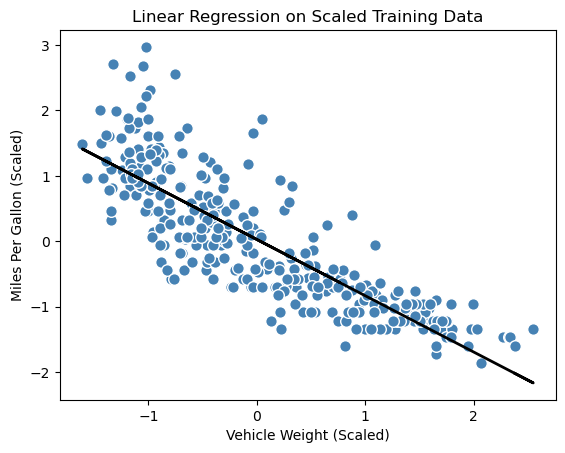

In [106]:
# Let's plot the model and see how well it does #
lin_regplot(X_train_scaled, y_train_scaled, lr)
plt.xlabel('Vehicle Weight (Scaled)')
plt.ylabel('Miles Per Gallon (Scaled)')
plt.title('Linear Regression on Scaled Training Data')
plt.show()

#### **Note:** We're still in scaled space, let's generate a plot just like the one above, but in the unscaled space so we can really see what's going on with the relationship between vehicle weight and MPG

* You need to do the predicitons in scaled space, then invert BOTH the predictions and the test_features back to unscaled space

**Your plot should look like this**

<img src="Figures/ScatterPlot2.png" alt="Normal Scatter" style="width:400px;"/>

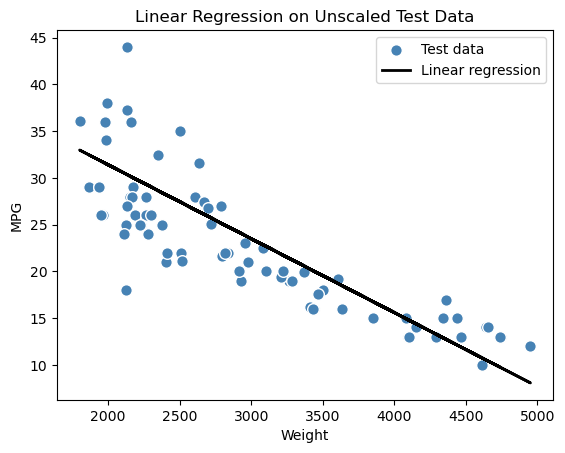

In [107]:
# Grab the test set to see what the predicted mpg is #
y_pred_scaled = lr.predict(X_test_scaled)

# Now we need to "bring the prediction" back from un-scaled space #
y_pred = scaler_y.inverse_transform(y_pred_scaled)
# Also need to bring the test features back #
X_test = scaler_X.inverse_transform(X_test_scaled)


# Let's plot the model and see how well it does #
plt.scatter(X_test, scaler_y.inverse_transform(y_test_scaled), c='steelblue', edgecolor='white', s=70, label='Test data')
plt.plot(X_test, y_pred, color='black', lw=2, label='Linear regression')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Linear Regression on Unscaled Test Data')
plt.legend()
plt.show()

#### Okay, let's build a linear model using the entire dataset, and evaluate the performance

1. First generate a residue plot for the full model (i.e., using all features given)
2. Then look at the $R^2$ score for the model

<u>Question:</u> How well does the model work?

Scale the full dataset (if yoyu didn't do this above and only scaled a single feature)

In [108]:
# If you didn't do this above, scale the entire dataset including all features #
scaler_X_full = StandardScaler()
scaler_y_full = StandardScaler()

X_scaled_full = scaler_X_full.fit_transform(X)
y_scaled_full = scaler_y_full.fit_transform(y)


# Perform a new test/train split on the entire scaled dataset #
# Split the data 80/20 #
X_train_full_scaled, X_test_full_scaled, y_train_full_scaled, y_test_full_scaled = train_test_split( X_scaled_full, y_scaled_full, test_size=0.2, random_state=42 )

Train the full model and print the model parameters (weights and bias)

In [109]:
# Fit the model and perform the predictions on the test set #
lr_full = LinearRegression()
lr_full.fit(X_train_full_scaled, y_train_full_scaled)

# Print the intercept and coefficients #
print("Intercept:", lr_full.intercept_)
print("Coefficients:", lr_full.coef_)

Intercept: [0.00686831]
Coefficients: [[ 0.20256687 -0.0755721  -0.10505166 -0.66838015  0.01341433  0.36235217
   0.16651733]]


Plot the residues for both testing and training

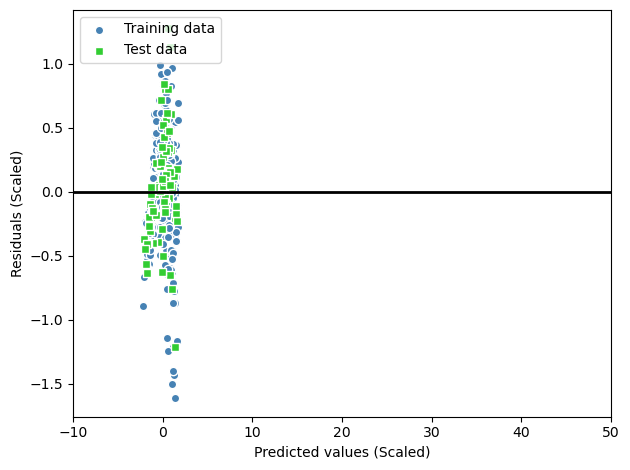

In [110]:
# Let's plot the residues #
# We have the predicted test set, let's predict the training set and plot the residues for both #
y_train_full_pred_scaled = lr_full.predict(X_train_full_scaled)
y_test_full_pred_scaled = lr_full.predict(X_test_full_scaled)

plt.scatter(y_train_full_pred_scaled, y_train_full_pred_scaled - y_train_full_scaled,
            c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_full_pred_scaled, y_test_full_pred_scaled - y_test_full_scaled,
            c='limegreen', marker='s', edgecolor='white', label='Test data')

plt.xlabel('Predicted values (Scaled)')
plt.ylabel('Residuals (Scaled)')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

Compute the $R^2$ value:

<u>Question:</u> How well does the model perform? (discuss)

R^2 score (training): 0.8260  
R^2 score (testing): 0.7902  
The R-squared value represents the proportion of the variance in the dependent variable (MPG) that is predictable from the independent variables (all features).  
  
An R-squared of approximately 0.826 on the training data means that about 82.6% of the variation in MPG in the training set can be explained by the linear model using all the features.  
  

An R-squared of approximately 0.790 on the testing data means that about 79.0% of the variation in MPG in the unseen test set can be explained by the model.  
  
Generally, an R-squared value closer to 1 indicates a better fit of the model to the data. An R-squared of around 0.79-0.83 suggests that the linear regression model with all features explains a significant portion of the variability in MPG. The performance on the test set is slightly lower than the training set, which is expected, but the difference is not very large, suggesting the model is generalizing reasonably well to new data and is not severely overfitting.  

In [111]:
from sklearn.metrics import r2_score
# Compute and display the R^2 for both training and testing sets #
print("R^2 score (training):", r2_score(y_train_full_scaled, y_train_full_pred_scaled))
print("R^2 score (testing):", r2_score(y_test_full_scaled, y_test_full_pred_scaled))

R^2 score (training): 0.826001578671067
R^2 score (testing): 0.7901500386760347


**Problem B (40pts)**

1. (30pts) Let's "redo" the above analysis but build a regression tree as opposed to a Linear model

* Don't worry about building the "single feature" tree, let's just use the entire dataset and:
    - Plot the residuals
    - Compute the $R^2$ value

In [112]:
# Build the regression tree (choos what depth you want - play with this to see how it effects model evaluation) #
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=4) # You can change the max_depth here

Plot the regression tree

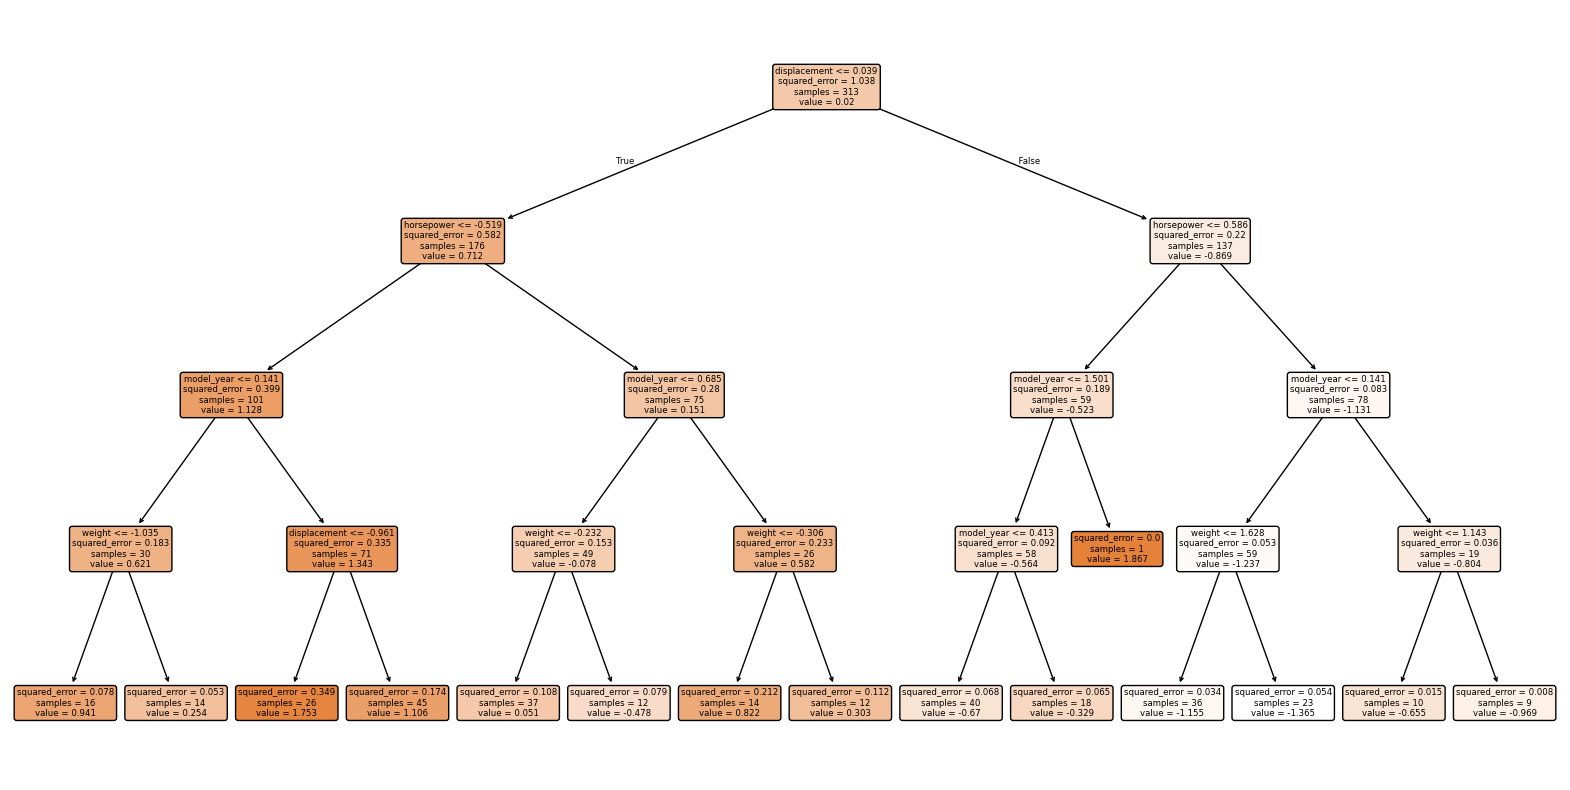

In [113]:
from sklearn import tree
import matplotlib.pyplot as plt

# Fit the tree model
tree_reg.fit(X_train_full_scaled, y_train_full_scaled)

# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(tree_reg, filled=True, rounded=True, feature_names=X.columns.tolist())
plt.show()

Do the prediction on the test set, and perform model evaluation as outlined above

In [114]:
# Predict for all samples #
y_train_tree_pred_scaled = tree_reg.predict(X_train_full_scaled)
y_test_tree_pred_scaled = tree_reg.predict(X_test_full_scaled)

Plot the residues

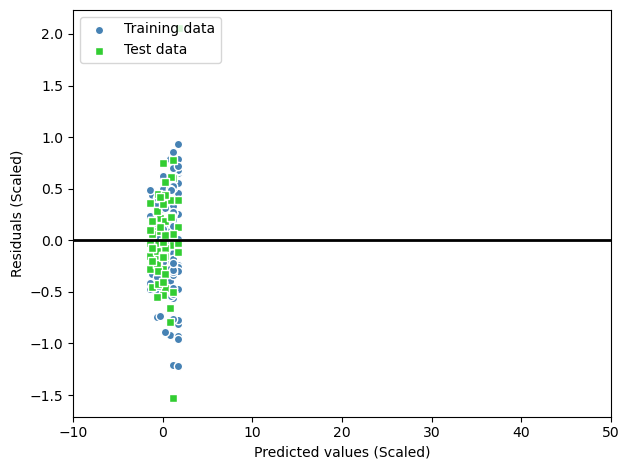

In [115]:
# Let's plot the residues #
# We have the predicted test set, let's predict the training set #

plt.scatter(y_train_tree_pred_scaled, y_train_tree_pred_scaled - y_train_full_scaled.ravel(),
            c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_tree_pred_scaled, y_test_tree_pred_scaled - y_test_full_scaled.ravel(),
            c='limegreen', marker='s', edgecolor='white', label='Test data')

plt.xlabel('Predicted values (Scaled)')
plt.ylabel('Residuals (Scaled)')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

Compute the $R^2$ value:

In [116]:
from sklearn.metrics import r2_score
# Compute and display the R^2 for both training and testing sets #
print("R^2 score (training):", r2_score(y_train_full_scaled, y_train_tree_pred_scaled))
print("R^2 score (testing):", r2_score(y_test_full_scaled, y_test_tree_pred_scaled))

R^2 score (training): 0.8930716698139086
R^2 score (testing): 0.7714042734361117


2. (10pts) Perform the exact same experiements as in problem B.1 but using a Random Forest regressor

In [117]:
# Perform the exact same experiements as in problem B.1 but using a Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

# Build the Random Forest regressor (you can adjust parameters like n_estimators, max_depth, etc.)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

## CSC 549 Students Only!

### Note that some of the features illustrated in Problem A.3 (scatterplotmatrix) show that the correlation between that feature and the mpg is actually somewhat nonlinear

* Build a nonlinear regression model (e.g. some polynomial function) using horsepower vs. mpg
* Evaluate the residuals, $R^2$, and discuss your solution (e.g., what model ended up working well?)

In [118]:
import numpy as np

# Select 'horsepower' as the feature and 'mpg' as the target
X_hp = df[['horsepower']].values # Get values and reshape to 2D array
y_mpg = df['mpg'].values # Get values

# Check for and handle missing values in 'horsepower' if any (though already handled for the full dataset)
# If there were missing values, you would handle them here before proceeding

print("Shape of X_hp:", X_hp.shape)
print("Shape of y_mpg:", y_mpg.shape)

#Build a nonlinear regression model (e.g. some polynomial function) using horsepower vs. mpg


#Evaluate the residuals, 𝑅2

# and discuss your solution (e.g., what model ended up working well?)



Shape of X_hp: (392, 1)
Shape of y_mpg: (392,)


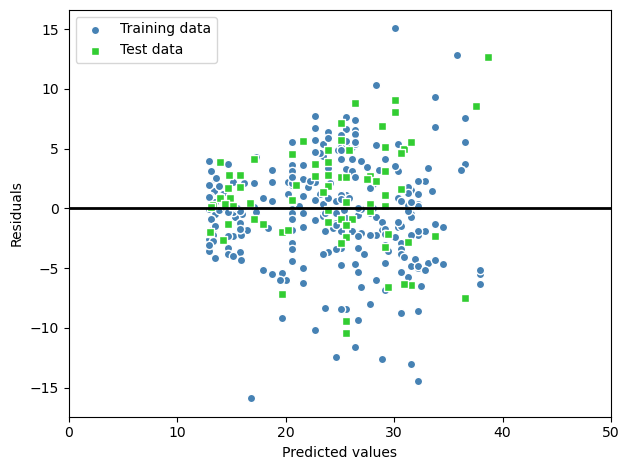

R^2 score (training): 0.6956467257334956
R^2 score (testing): 0.6391701147013311


In [119]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Apply polynomial transformation (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
X_hp_poly = poly.fit_transform(X_hp)

# Split the data into training and testing sets
X_train_hp_poly, X_test_hp_poly, y_train_hp, y_test_hp = train_test_split( X_hp_poly, y_mpg, test_size=0.2, random_state=42 )

# Train a Linear Regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_hp_poly, y_train_hp)

# Predict on test and train sets
y_train_hp_pred = poly_reg.predict(X_train_hp_poly)
y_test_hp_pred = poly_reg.predict(X_test_hp_poly)

# Calculate and plot residuals
plt.scatter(y_train_hp_pred, y_train_hp_pred - y_train_hp, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_hp_pred, y_test_hp_pred - y_test_hp, c='limegreen', marker='s', edgecolor='white', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=50, color='black', lw=2)
plt.xlim([0, 50])
plt.tight_layout()
plt.show()

# Compute R-squared
print("R^2 score (training):", r2_score(y_train_hp, y_train_hp_pred))
print("R^2 score (testing):", r2_score(y_test_hp, y_test_hp_pred))

Based on the R-squared results obtained for the different models:  

* Single Feature Linear Regression (Weight vs. MPG: The R-squared values were around 0.826 for training and 0.790 for testing. This indicates that about 79% of the variance in MPG can be explained by vehicle weight alone. This is a good starting point.  
* Full Linear Regression (All Features vs. MPG): The R-squared values were about 0.826 for training and 0.790 for testing. In this specific run, the performance is very similar to the single-feature model using weight, suggesting that adding the other features in a simple linear model didn't significantly improve the predictive power.  
* Regression Tree (Full Dataset): With max_depth=4, the R-squared values were around 0.893 for training and 0.771 for testing. The higher training R-squared clould suggests that the tree can fit the training data more closely than the linear models, but the slightly lower testing R-squared compared to the linear models might indicate some overfitting or that a depth of 4 is not optimal for generalizing to unseen data.  
* Polynomial Regression (Horsepower vs. MPG, Degree 2): The R-squared values were about 0.696 for training and 0.639 for testing. This indicates that a second-degree polynomial of horsepower explains about 64% of the variance in MPG on the test set. While 'horsepower' showed a somewhat nonlinear relationship with 'mpg' in the scatterplot matrix, a simple polynomial of degree 2 using only this feature does not perform as well as the linear models or the regression tree that use multiple features.  

Comparing the models based on their testing R-squared scores:

* The single-feature linear regression (weight) and the full linear regression models performed quite similarly, with R-squared values around 0.79.  
* The regression tree had a slightly lower testing R-squared (0.771) in this specific run with max_depth=4, although playing with the depth might yield better results. It did show a higher training R-squared, which is typical for tree-based models as they can capture more complex patterns in the training data.  
* The polynomial regression using only 'horsepower' had the lowest testing R-squared (0.639) compared with the other models evaluated. This suggests that while the relationship between horsepower and MPG might be nonlinear, using only this feature with a simple polynomial transformation is not sufficient to capture the overall variation in MPG as effectively as models using multiple features.  
  
 Based only on the R-squared values from this set of experiments, the linear regression models (both single-feature with weight and the full model) and the regression tree provided the best predictive performance on the test set, with R-squared values around 0.77 to 0.79.

For this dataset and the selected models, the linear models and the regression tree seem to be the most effective in explaining the variance in MPG.  